# Spatial interpolation 

In this Notebook we are going to extract the elevation of several points randomly and **interactively** selected over a digital elevation model (DEM). Then we are going to do an **spatial interpolation** and evaluate how good this interpolation is.

### **Steps**
0. **Import the necessary libraries**

In [1]:
# Import libraries
import numpy as np  # Import the NumPy library for numerical operations, particularly for arrays.
import rasterio  # Import the rasterio library for reading and writing geospatial raster data (like GeoTIFFs).
import matplotlib.pyplot as plt  # Import matplotlib's pyplot module for creating plots and visualizations.
from ipywidgets import interact # create interactive controls (like sliders, dropdowns, etc.)
from scipy import interpolate # interpolate spatially

1. **Load the DEM Raster**  
   - The code uses `rasterio` to open a DEM stored in `'datos/dem.tif'`.
   - The DEM is read as a 2D NumPy array (`dem`) representing elevation values.

In [2]:
# Open the Digital Elevation Model (DEM) raster file
raster = rasterio.open('datos/dem.tif')

# Read the first band of the DEM (assuming it's a single-band raster)
dem = raster.read(1)  # Extracts a 2D array representing elevation values

# Get the number of rows and columns in the DEM
n_rows, n_cols = dem.shape

2. **Random Points Generation**  

In [3]:
# Define the number of points to extract
n_points = 30

# Generate random row and column indices within the DEM dimensions
np.random.seed(42)
rows = np.random.randint(0, n_rows, n_points)  # Random row indices
cols = np.random.randint(0, n_cols, n_points)  # Random column indices

3. **Extract Elevation Values**  
   - Using the randomly generated coordinates, elevation values are retrieved from the `dem` array.

In [4]:
# Extract elevation values at the randomly selected points
elevations = dem[rows, cols]

4. **Interpolate the elevation values**
This code performs **spatial interpolation** to create a gridded representation of elevation data using the **nearest-neighbor** method. Here's a step-by-step breakdown:

    4.1. Create a Grid of Coordinates

In [5]:
grid_x, grid_y = np.meshgrid(np.arange(0, n_rows), np.arange(0, n_cols), indexing='ij')

- `np.meshgrid()` generates a 2D coordinate grid covering the range `[0, n_rows-1]` (rows) and `[0, n_cols-1]` (columns).
- The `indexing='ij'` option ensures that the first index corresponds to rows and the second to columns (matrix-style indexing).

    4.2. Interpolate Elevation Data

In [6]:
dem_inter = interpolate.griddata(np.column_stack([rows, cols]), elevations, (grid_x, grid_y), method='nearest')

- `rows`, `cols`: Arrays containing the coordinates of known elevation points.
- `elevations`: Array of known elevation values at these points.
- `np.column_stack([rows, cols])`: Combines `rows` and `cols` into a 2D array of (x, y) coordinate pairs.
- `griddata()` interpolates the elevation values to the entire `(grid_x, grid_y)` grid using the **nearest-neighbor** method.

- `grid_z` is a 2D array representing the interpolated elevation values for each grid point, based on the nearest known data point.

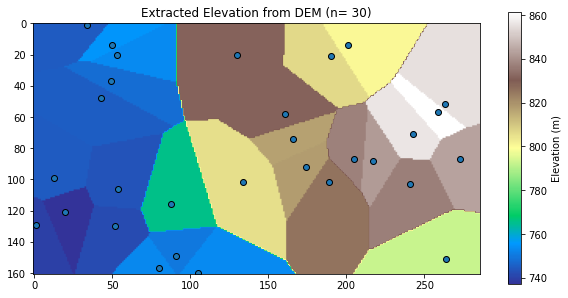

In [7]:
# Plot the interpolated DEM with the extracted points
plt.figure(figsize=(10, 5))  # Set the figure size
plt.imshow(dem_inter, cmap='terrain')  # Display the interpolated DEM using a terrain colormap
plt.colorbar(label='Elevation (m)')  # Add a color bar indicating elevation values
plt.scatter(cols, rows, edgecolor='k')  
# Overlay the randomly selected points, color-coded by elevation
plt.title('Extracted Elevation from DEM (n= '+str(n_points)+')')  # Add a title
plt.show()  # Display the plot

### How about making our code and figures more interactive?
Here we are going to create an **interactive figure** so we can select the number of sampling points using a slider

In [8]:
from ipywidgets import interact

# Extract elevation at given points
def interactive_extract_elevation(n_points):
    
    """
    Generates random points within the DEM and extracts elevation values.
    Displays:
    1. The DEM with sampled elevation points.
    
    Parameters:
    - n_points (int): Number of random points to extract.
    """

    # Generate random row and column indices within the DEM dimensions
    np.random.seed(42)
    rows = np.random.randint(0, n_rows, n_points)  # Random row indices
    cols = np.random.randint(0, n_cols, n_points)  # Random column indices

    # Extract elevation values at the randomly selected points
    elevations = dem[rows, cols]
    
    # Spatial interpolation
    grid_x, grid_y = np.meshgrid(np.arange(0, n_rows), np.arange(0, n_cols), indexing='ij')
    dem_inter = interpolate.griddata(np.column_stack([rows, cols]), elevations, (grid_x, grid_y), method='nearest')

    # Plot the DEM with the extracted points
    plt.figure(figsize=(10, 5))  # Set the figure size
    plt.imshow(dem_inter, cmap='terrain')  # Display the DEM using a terrain colormap
    plt.colorbar(label='Elevation (m)')  # Add a color bar indicating elevation values
    plt.scatter(cols, rows, edgecolor='k')  
    # Overlay the randomly selected points, color-coded by elevation
    plt.title('Extracted Elevation from DEM (n= '+str(n_points)+')')  # Add a title
    plt.show()  # Display the plot

# Interactive widget for number of points
interact(interactive_extract_elevation, n_points=(1, 500))


interactive(children=(IntSlider(value=250, description='n_points', max=500, min=1), Output()), _dom_classes=('…

<function __main__.interactive_extract_elevation(n_points)>

### Let's add the histogram as well! 
To show both plots next to each other we need to use a Matplotlib function called `subplots`

In [9]:
def interactive_extract_elevation(n_points, n_bins):
    """
    Generates random points within the DEM and extracts elevation values.
    Displays:
    1. The DEM with sampled elevation points.
    2. A histogram of the sampled elevation values.
    
    Parameters:
    - n_points (int): Number of random points to extract.
    """

    # Generate random row and column indices within the DEM dimensions
    np.random.seed(42)
    rows = np.random.randint(0, n_rows, n_points)  # Random row indices
    cols = np.random.randint(0, n_cols, n_points)  # Random column indices

    # Extract elevation values at the randomly selected points
    elevations = dem[rows, cols]
    
    # Spatial interpolation
    grid_x, grid_y = np.meshgrid(np.arange(0, n_rows), np.arange(0, n_cols), indexing='ij')
    dem_inter = interpolate.griddata(np.column_stack([rows, cols]), elevations, (grid_x, grid_y), method='nearest')

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(17, 5))

    # Plot the DEM with the extracted points
    axes[0].imshow(dem_inter, cmap='terrain')
    axes[0].scatter(cols, rows, edgecolor='k')  
    axes[0].set_title('Extracted Elevation from DEM (n= '+str(n_points)+')')

    # Plot histogram of the extracted elevation values
    axes[1].hist(elevations, bins=n_bins, color='skyblue', edgecolor='black')
    axes[1].set_xlabel('Elevation (m)')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('Histogram of Extracted Elevation Values')

    plt.show()  # Display the plots

# Create an interactive widget to select the number of points
interact(interactive_extract_elevation, n_points=(1, 500), n_bins = (10,100))


interactive(children=(IntSlider(value=250, description='n_points', max=500, min=1), IntSlider(value=55, descri…

<function __main__.interactive_extract_elevation(n_points, n_bins)>

### Let's compare the variograms of the sampling point values vs the variogram of the entire DEM

In [10]:
def interactive_extract_elevation(n_points):
    """
    Generates random points within the DEM and extracts elevation values.
    Displays:
    1. The DEM with sampled elevation points.
    2. The histograms of the sampled elevation values vs the original DEM 
    
    Parameters:
    - n_points (int): Number of random points to extract.
    """

    # Generate random row and column indices within the DEM dimensions
    np.random.seed(42)
    rows = np.random.randint(0, n_rows, n_points)  # Random row indices
    cols = np.random.randint(0, n_cols, n_points)  # Random column indices

    # Extract elevation values at the randomly selected points
    elevations = dem[rows, cols]

    # Spatial interpolation
    grid_x, grid_y = np.meshgrid(np.arange(0, n_rows), np.arange(0, n_cols), indexing='ij')
    dem_inter = interpolate.griddata(np.column_stack([rows, cols]), elevations, (grid_x, grid_y), method='nearest')

    # Create a figure with two subplots
    fig, axes = plt.subplots(2, 2, figsize=(17, 10))

    # Plot the DEM with the extracted points
    axes[0,0].imshow(dem, cmap='terrain')
    axes[0,0].set_title('Extracted Elevation from DEM (n= '+str(n_points)+')')
    
    # Plot histogram of the extracted elevation values
    axes[0,1].hist(elevations, bins=50, color='skyblue', edgecolor='black', density = True)
    axes[0,1].hist(dem.flatten(),bins = 50,histtype='step', density = True, label = 'DEM')
    axes[0,1].set_xlabel('Elevation (m)')
    axes[0,1].set_ylabel('Density')
    axes[0,1].set_title('Histogram of Extracted Elevation Values vs DEM histogram')
    axes[0,1].set_ylim([0,0.025])

    axes[1,0].imshow(dem_inter, cmap='terrain')
    axes[1,0].set_title('Interpolated DEM')
    axes[1,0].scatter(cols, rows, edgecolor='k', alpha = 0.5)
  
    plt.show()  # Display the plots

# Create an interactive widget to select the number of points
interact(interactive_extract_elevation, n_points=(1, 500))


interactive(children=(IntSlider(value=250, description='n_points', max=500, min=1), Output()), _dom_classes=('…

<function __main__.interactive_extract_elevation(n_points)>

## Interactive spatial interpolation + evaluation
Let's visualize and **evaluate** the spatial interpolation that we can obtain for different numbers of random sampling points. For this purpose we will use the **Mean Absolute Error (MAE)**. The MAE measures the average absolute difference between the original DEM and the interpolated DEM.  A lower MAE indicates a better interpolation.

In [11]:
def interactive_interpolation(n_points):
    """
    Generates random points within the DEM and extracts elevation values.
    Displays:
    1. The DEM with sampled elevation points.
    2. The histograms of the sampled elevation values vs the original DEM 
    3. The interpolated DEM
    4. The difference between the original DEM and the interpolated DEM
    
    Parameters:
    - n_points (int): Number of random points to extract.
    """

    # Generate random row and column indices within the DEM dimensions
    np.random.seed(42)
    rows = np.random.randint(0, n_rows, n_points)  # Random row indices
    cols = np.random.randint(0, n_cols, n_points)  # Random column indices

    # Extract elevation values at the randomly selected points
    elevations = dem[rows, cols]
    
    # Spatial interpolation
    grid_x, grid_y = np.meshgrid(np.arange(0, n_rows), np.arange(0, n_cols), indexing='ij')
    grid_z = interpolate.griddata(np.column_stack([rows, cols]), elevations, (grid_x, grid_y), method='nearest')

    # Create a figure with two subplots
    fig, axes = plt.subplots(2, 2, figsize=(17, 10))

    # Plot the DEM with the extracted points
    axes[0,0].imshow(dem, cmap='terrain')
    axes[0,0].set_title('Extracted Elevation from DEM (n= '+str(n_points)+')')
    
    # Plot histogram of the extracted elevation values
    axes[0,1].hist(elevations, bins=50, color='skyblue', edgecolor='black', density = True)
    axes[0,1].hist(dem.flatten(),bins = 50,histtype='step', density = True, label = 'DEM')
    axes[0,1].set_xlabel('Elevation (m)')
    axes[0,1].set_ylabel('Density')
    axes[0,1].set_title('Histogram of Extracted Elevation Values vs DEM histogram')
    axes[0,1].set_ylim([0,0.025])

    axes[1,0].imshow(grid_z, cmap='terrain')
    axes[1,0].set_title('Interpolated DEM')
    axes[1,0].scatter(cols, rows, edgecolor='k', alpha = 0.5)
    plot4 = axes[1,1].imshow(dem-grid_z, cmap='terrain',vmin=-10,vmax=10)
    # Mean absolute error
    MAE = np.nanmean(np.abs(dem-grid_z))
    axes[1,1].set_title(f'Mean absolute error (Original vs Interpolated DEM) = {MAE:.2f}') 
    plt.colorbar(plot4)
    plt.show()  # Display the plots

# Create an interactive widget to select the number of points
interact(interactive_interpolation, n_points=(10, 500))

interactive(children=(IntSlider(value=255, description='n_points', max=500, min=10), Output()), _dom_classes=(…

<function __main__.interactive_interpolation(n_points)>

### Let's compare different interpolation methods

In [12]:
def interactive_interpolation(n_points, interp_method):
    """
    Generates random points within the DEM and extracts elevation values.
    Displays:
    1. The DEM with sampled elevation points.
    2. The histograms of the sampled elevation values vs the original DEM 
    3. The interpolated DEM
    4. The difference between the original DEM and the interpolated DEM
    
    Parameters:
    - n_points (int): Number of random points to extract.
    - interp_method (str): Interpolation method to apply
    """

    # Generate random row and column indices within the DEM dimensions
    np.random.seed(42)
    rows = np.random.randint(0, n_rows, n_points)  # Random row indices
    cols = np.random.randint(0, n_cols, n_points)  # Random column indices

    # Extract elevation values at the randomly selected points
    elevations = dem[rows, cols]
    
    grid_x, grid_y = np.meshgrid(np.arange(0, n_rows), np.arange(0, n_cols), indexing='ij')
    grid_z = interpolate.griddata(np.column_stack([rows, cols]), elevations, (grid_x, grid_y), method= interp_method)

    # Create a figure with two subplots
    fig, axes = plt.subplots(2, 2, figsize=(17, 10))

    # Plot the DEM with the extracted points
    axes[0,0].imshow(dem, cmap='terrain')
    axes[0,0].set_title('Extracted Elevation from DEM (n= '+str(n_points)+')')
    
    # Plot histogram of the extracted elevation values
    axes[0,1].hist(elevations, bins=50, color='skyblue', edgecolor='black', density = True)
    axes[0,1].hist(dem.flatten(),bins = 50,histtype='step', density = True, label = 'DEM')
    axes[0,1].set_xlabel('Elevation (m)')
    axes[0,1].set_ylabel('Density')
    axes[0,1].set_title('Histogram of Extracted Elevation Values vs DEM histogram')
    axes[0,1].set_ylim([0,0.025])

    axes[1,0].imshow(grid_z, cmap='terrain')
    axes[1,0].set_title('Interpolated DEM')
    axes[1,0].scatter(cols, rows, edgecolor='k', alpha = 0.1)
    plot4 = axes[1,1].imshow(dem-grid_z, cmap='terrain',vmin=-10,vmax=10)
    MAE = np.nanmean(np.abs(dem-grid_z))
    axes[1,1].set_title(f'MAE = {MAE:.2f}')    
    plt.colorbar(plot4)
    plt.show()  # Display the plots

# Create an interactive widget to select the number of points
interact(interactive_interpolation, n_points=(10, 5000), interp_method = (['nearest', 'linear', 'cubic']))

interactive(children=(IntSlider(value=2505, description='n_points', max=5000, min=10), Dropdown(description='i…

<function __main__.interactive_interpolation(n_points, interp_method)>